Helpful forks:
[Data analysis and visualization for beginners](https://www.kaggle.com/bsivavenu/data-analysis-and-visualization-for-beginners)

# Task definition

As there is access to features and outcome variable (probability of selling) this is a supervised machine learning task.
The dependent variable, the one that needs to be predicted (*probability of selling*) is a continious variable. This means this is a *supervised regression task*. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir('input'))

['.DS_Store', 'periods_test.csv.zip', 'periods_train.csv.zip', 'test.csv', 'test.csv.zip', 'test_active.csv.zip', 'train.csv', 'train.csv.zip', 'train_active.csv.zip']


In [3]:
train_df = pd.read_csv("input/train.csv", parse_dates=["activation_date"])
test_df = pd.read_csv("input/test.csv", parse_dates=["activation_date"])
train_df.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


In [5]:
train_df.describe()

,price,item_seq_number,image_top_1,deal_probability
count,1.418062e+06,1.503424e+06,1.390836e+06,1.503424e+06
mean,3.167081e+05,7.436740e+02,1.241932e+03,1.391306e-01
std,6.689154e+07,5.572522e+03,9.704641e+02,2.600785e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000e+02,9.000000e+00,4.250000e+02,0.000000e+00
50%,1.300000e+03,2.900000e+01,1.057000e+03,0.000000e+00
75%,7.000000e+03,8.800000e+01,2.217000e+03,1.508700e-01
max,7.950101e+10,2.044290e+05,3.066000e+03,1.000000e+00


In [6]:
train_df.dtypes

item_id                         object
user_id                         object
region                          object
city                            object
parent_category_name            object
category_name                   object
param_1                         object
param_2                         object
param_3                         object
title                           object
description                     object
price                          float64
item_seq_number                  int64
activation_date         datetime64[ns]
user_type                       object
image                           object
image_top_1                    float64
deal_probability               float64
dtype: object

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
sns.distplot(train_df.deal_probability.values)

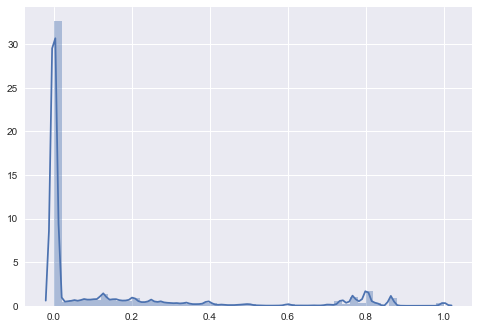

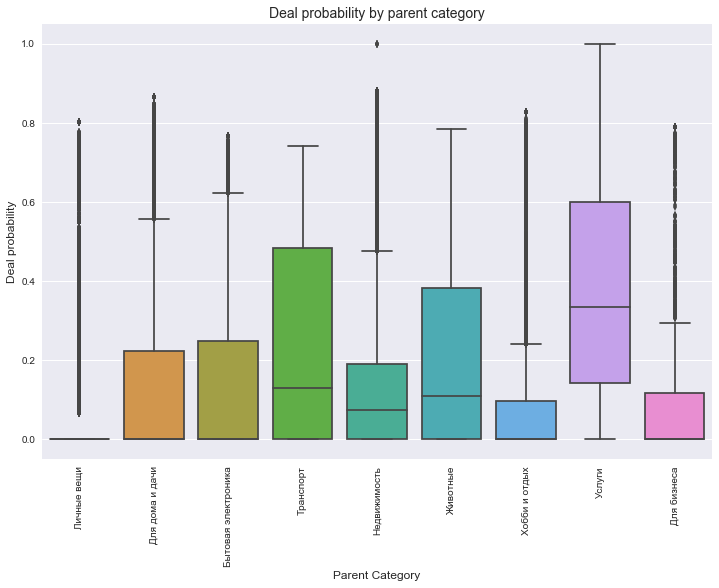

In [9]:
plt.figure(figsize=(12,8))
sns.boxplot(x="parent_category_name", y="deal_probability", data=train_df)
plt.ylabel('Deal probability', fontsize=12)
plt.xlabel('Parent Category', fontsize=12)
plt.title("Deal probability by parent category", fontsize=14)
plt.xticks(rotation='vertical')
plt.show()

Density plot of selling probability by parent category
Density plot of selling probability by parent city
Density plot of selling probability by parent price


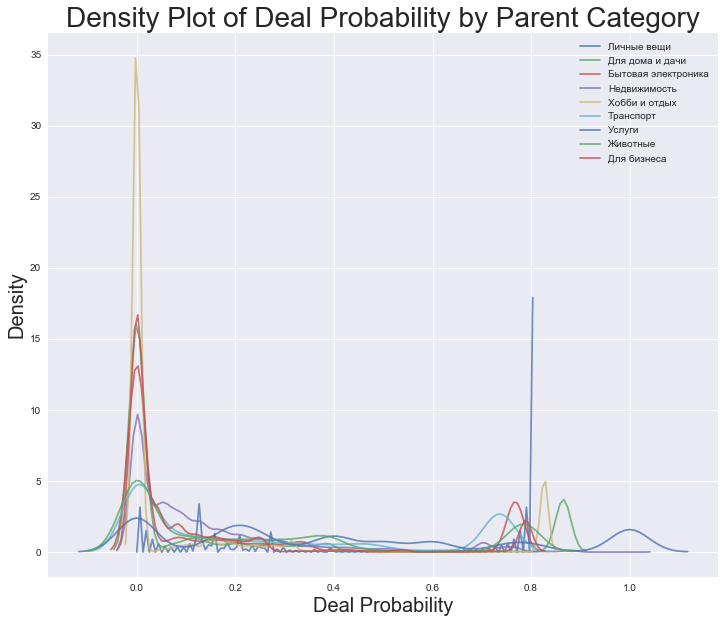

In [10]:
# Create a list of parent categories with more than 100 measurements
types = train_df.dropna(subset=['deal_probability'])
types = types['parent_category_name'].value_counts()
types = list(types[types.values > 100].index)

# Plot of distribution of scores for building categories
plt.figure(figsize=(12, 10))

# Plot each Parent Category
for pc_type in types:
    # Select the building type
    subset = train_df[train_df['parent_category_name'] == pc_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['deal_probability'].dropna(),
               label = pc_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Deal Probability', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Deal Probability by Parent Category', size = 28);
plt.show()

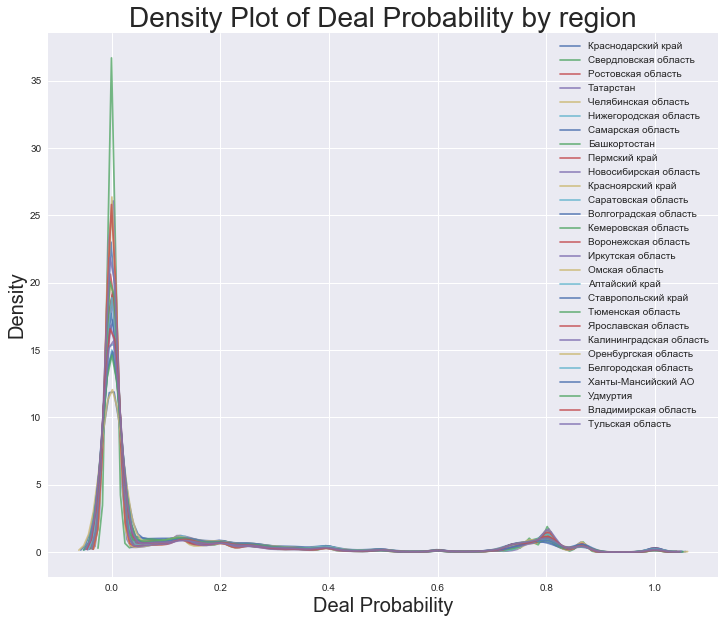

In [11]:
# Create a list of region with more than 100 measurements
types = train_df.dropna(subset=['deal_probability'])
types = types['region'].value_counts()
types = list(types[types.values > 100].index)

# Plot of distribution of scores for building categories
#figsize(12, 10) # works in a later version of pandas
plt.figure(figsize=(12, 10))

# Plot each region
for pc_type in types:
    # Select the building type
    subset = train_df[train_df['region'] == pc_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['deal_probability'].dropna(),
               label = pc_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Deal Probability', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Deal Probability by region', size = 28);
plt.show()

In [12]:
# Find all correlations with the score and sort 
correlations_data = train_df.corr()['deal_probability'].sort_values()

In [5]:
correlations_data

NameError: name 'correlations_data' is not defined

low correlation between deal probability and other continuous variables

# replace missing price by median price

In [6]:
test_df.isnull().sum() / test_df.shape[0] * 100

item_id                  0.000000
user_id                  0.000000
region                   0.000000
city                     0.000000
parent_category_name     0.000000
category_name            0.000000
param_1                  4.505957
param_2                 45.871670
param_3                 60.249431
title                    0.000000
description              0.000000
price                    6.015483
item_seq_number          0.000000
activation_date          0.000000
user_type                0.000000
image                    8.380373
image_top_1              8.380373
dtype: float64

only writing test.isnull() gives me T/F for each cell.

In [7]:
test_df['price'].median()

1500.0

In [6]:
test_df.loc[:,'price_new'] = test_df['price'].fillna(test_df['price'].median())

In [17]:
#test_df['price'].groupby('parent_category_name').median()

#test_df.loc[:, 'price_grpparent'] =test_df['price'].fillna(test_df['price'].groupby('parent_category_name').median())

# Feature Engineering & Selection

Feature engineering is the task of transforming the orginal variables into variabels that can be used for in the model. This invovles transforming categorial variables (ordinal and nominal) into numbers, and transforming numberical values (e.g., log transformation, centering, square root). When transforming numberical data, domain expertise and testing is necessary. Goal is to put all variables unto similar scales. 

## Categorial variables One-hot encoding of categorial data

Transformation of numberical variable price ? The min/max is quite different, as is the stdev. 

In [19]:
# Copy the original data
features = train_df.copy()

In [ ]:
# is this necessary?

# Select the numeric columns
numeric_subset = train_df.select_dtypes(include=['number'])

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Deal probability 
    if col == 'deal_probability':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

In [ ]:
# Select the categorical columns
#categorical_subset = train_df.select_dtypes(include=['object'])

# One hot encode
#categorical_subset = pd.get_dummies(categorical_subset)

takes too long (several hours)

In [ ]:
# Join the two dataframes using concata
# Make sure to use axis = 1 to perform a column bind
#features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Catboost for Avito Demand Prediction Challenge
[By Nick Brooks, April 2018](https://www.kaggle.com/c/avito-demand-prediction)

In [7]:
import time
notebookstart= time.time()

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
print("Data:\n",os.listdir("input"))

# Models Packages
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import feature_selection
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

Data:
 ['.DS_Store', 'periods_test.csv.zip', 'periods_train.csv.zip', 'test.csv', 'test.csv.zip', 'test_active.csv.zip', 'train.csv', 'train.csv.zip', 'train_active.csv.zip']


In [10]:
# Viz
import seaborn as sns
import matplotlib.pyplot as plt

print("\nData Load Stage")
training = pd.read_csv('input/train.csv', index_col = "item_id", parse_dates = ["activation_date"])#.sample(1000)
traindex = training.index
testing = pd.read_csv('input/test.csv', index_col = "item_id", parse_dates = ["activation_date"])#.sample(1000)
testdex = testing.index
y = training.deal_probability.copy()
training.drop("deal_probability",axis=1, inplace=True)
print('Train shape: {} Rows, {} Columns'.format(*training.shape))
print('Test shape: {} Rows, {} Columns'.format(*testing.shape))


Data Load Stage
Train shape: 1503424 Rows, 16 Columns
Test shape: 508438 Rows, 16 Columns


In [11]:
# Combine Train and Test
df = pd.concat([training,testing],axis=0)
del training, testing
gc.collect()
print('\nAll Data shape: {} Rows, {} Columns'.format(*df.shape))

print("Feature Engineering")
df["price"] = np.log(df["price"]+0.001)
df["price"].fillna(-999,inplace=True)
df["image_top_1"].fillna(-999,inplace=True)

print("\nCreate Time Variables")
df["Weekday"] = df['activation_date'].dt.weekday
df["Weekd of Year"] = df['activation_date'].dt.week
df["Day of Month"] = df['activation_date'].dt.day


All Data shape: 2011862 Rows, 16 Columns
Feature Engineering

Create Time Variables


In [12]:
# Remove Dead Variables
df.drop(["activation_date","image"],axis=1,inplace=True)

print("\nEncode Variables")
categorical = ["user_id","region","city","parent_category_name","category_name","item_seq_number","user_type","image_top_1"]
messy_categorical = ["param_1","param_2","param_3","title","description"] # Need to find better technique for these
print("Encoding :",categorical + messy_categorical)

# Encoder:
lbl = preprocessing.LabelEncoder()
for col in categorical + messy_categorical:
    df[col] = lbl.fit_transform(df[col].astype(str))
    
print("\nCatboost Modeling Stage")
X = df.loc[traindex,:].copy()
print("Training Set shape",X.shape)
test = df.loc[testdex,:].copy()
print("Submission Set Shape: {} Rows, {} Columns".format(*test.shape))
del df
gc.collect()


Encode Variables
Encoding : ['user_id', 'region', 'city', 'parent_category_name', 'category_name', 'item_seq_number', 'user_type', 'image_top_1', 'param_1', 'param_2', 'param_3', 'title', 'description']

Catboost Modeling Stage
Training Set shape (1503424, 17)
Submission Set Shape: 508438 Rows, 17 Columns


103

In [13]:
# Training and Validation Set
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.10, random_state=23)

In [14]:
# Prepare Categorical Variables
def column_index(df, query_cols):
    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols,query_cols,sorter=sidx)]
categorical_features_pos = column_index(X,categorical + messy_categorical)

In [ ]:
# Train Model
print("Train CatBoost Decision Tree")
modelstart= time.time()
cb_model = CatBoostRegressor(iterations=700,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='RMSE',
                             random_seed = 23,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 75,
                             od_wait=100)
cb_model.fit(X_train, y_train,
             eval_set=(X_valid,y_valid),
             cat_features=categorical_features_pos,
             use_best_model=True,
             verbose=True)

Train CatBoost Decision Tree
0:	learn: 0.2926718	test: 0.2938566	best: 0.2938566 (0)	total: 20s	remaining: 3h 53m 4s
75:	learn: 0.2345531	test: 0.2354897	best: 0.2354897 (75)	total: 21m 17s	remaining: 2h 54m 45s
150:	learn: 0.2280619	test: 0.2283835	best: 0.2283835 (150)	total: 40m 22s	remaining: 2h 26m 46s

Iteration with suspicious time -5.8e+03 sec ignored in overall statistics.


In [ ]:
# # Feature Importance
# fea_imp = pd.DataFrame({'imp': cb_model.feature_importances_, 'col': X.columns})
# fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
# _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
# plt.savefig('catboost_feature_importance.png')   

print("Model Evaluation Stage")
print(cb_model.get_params())
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, cb_model.predict(X_valid))))
catpred = cb_model.predict(test)
catsub = pd.DataFrame(catpred,columns=["deal_probability"],index=testdex)
catsub['deal_probability'].clip(0.0, 1.0, inplace=True)
catsub.to_csv("catsub.csv",index=True,header=True) # Between 0 and 1
print("Model Runtime: %0.2f Minutes"%((time.time() - modelstart)/60))
print("Notebook Runtime: %0.2f Minutes"%((time.time() - notebookstart)/60))

## Feature hashing

It represents categories in one-hot encoding style but with a sparse matrix. Pros and cons written out on (https://blog.myyellowroad.com/using-categorical-data-in-machine-learning-with-python-from-dummy-variables-to-deep-category-66041f734512)

In [ ]:
from sklearn.feature_extraction import FeatureHasher
X_train_hash = copy.copy(X_train)
X_test_hash = copy.copy(y_train)

for i in range(X_train_hash.shape[1]):
    X_train_hash.iloc[:,i]=X_train_hash.iloc[:,i].astype('str')
for i in range(X_test_hash.shape[1]):
    X_test_hash.iloc[:,i]=X_test_hash.iloc[:,i].astype('str')
h = FeatureHasher(n_features=100,input_type="string")
X_train_hash = h.transform(X_train_hash.values)
X_test_hash = h.transform(X_test_hash.values)

l.fit(X_train_hash,y_train)
y_pred = l.predict_proba(X_test_hash)
print(log_loss(y_test,y_pred))#0.4

r.fit(X_train_hash,y_train)
y_pred = r.predict_proba(X_test_hash)
print(log_loss(y_test,y_pred))

## Category2Vec

In [ ]:
from gensim.models.word2vec import Word2Vec
from random import shuffle
size=6
window=8
x_w2v = copy.deepcopy(data.iloc[:,features])
names = list(x_w2v.columns.values)
for i in names:
    x_w2v[i]=x_w2v[i].astype('category')
    x_w2v[i].cat.categories = ["Feature %s %s" % (i,g) for g in x_w2v[i].cat.categories]
x_w2v = x_w2v.values.tolist()
for i in x_w2v:
    shuffle(i)
w2v = Word2Vec(x_w2v,size=size,window=window)

X_train_w2v = copy.copy(X_train)
X_test_w2v = copy.copy(X_test)
for i in names:
    X_train_w2v[i]=X_train_w2v[i].astype('category')
    X_train_w2v[i].cat.categories = ["Feature %s %s" % (i,g) for g in X_train_w2v[i].cat.categories]
for i in names:
    X_test_w2v[i]=X_test_w2v[i].astype('category')
    X_test_w2v[i].cat.categories = ["Feature %s %s" % (i,g) for g in X_test_w2v[i].cat.categories]
X_train_w2v = X_train_w2v.values
X_test_w2v = X_test_w2v.values
x_w2v_train = np.random.random((len(X_train_w2v),size*X_train_w2v.shape[1]))
for j in range(X_train_w2v.shape[1]):
    for i in range(X_train_w2v.shape[0]):
        if X_train_w2v[i,j] in w2v:
            x_w2v_train[i,j*size:(j+1)*size] = w2v[X_train_w2v[i,j]]

x_w2v_test = np.random.random((len(X_test_w2v),size*X_test_w2v.shape[1]))
for j in range(X_test_w2v.shape[1]):
    for i in range(X_test_w2v.shape[0]):
        if X_test_w2v[i,j] in w2v:
            x_w2v_test[i,j*size:(j+1)*size] = w2v[X_test_w2v[i,j]]

l.fit(x_w2v_train,y_train)
y_pred = l.predict_proba(x_w2v_test)
print(log_loss(y_test,y_pred))

r.fit(x_w2v_train,y_train)
y_pred = r.predict_proba(x_w2v_test)
print(log_loss(y_test,y_pred))

## Deep Learning

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Reshape
from keras.layers import Merge
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint
import h5py

X_train_dnn = copy.copy(X_train).values
X_test_dnn = copy.copy(X_test).values
    
les = []
for i in range(X_train_dnn.shape[1]):
    le = preprocessing.LabelEncoder()
    le.fit(data.iloc[:,features].iloc[:, i])
    les.append(le)
    X_train_dnn[:, i] = le.transform(X_train_dnn[:, i])
    X_test_dnn[:, i] = le.transform(X_test_dnn[:, i])
    
def split_features(X):
    X_list = []

region = X[..., [0]]
    X_list.append(region)

city = X[..., [1]]
    X_list.append(city)

parent_category_name = X[..., [2]]
    X_list.append(parent_category_name)
    
param_1 = X[..., [3]]
    X_list.append(param_1)

param_2 = X[..., [4]]
    X_list.append(param_2)

param_3 = X[..., [5]]
    X_list.append(param_3)

category_name = X[..., [6]]
    X_list.append(category_name)

user_id = X[..., [7]]
    X_list.append(user_id)
    
item_id = X[..., [8]]
    X_list.append(item_id)


return X_list

class NN_with_EntityEmbedding(object):

def __init__(self, X_train, y_train, X_val, y_val):
        self.nb_epoch = 10
        self.__build_keras_model()
        self.fit(X_train, y_train, X_val, y_val)

def preprocessing(self, X):
        X_list = split_features(X)
        return X_list

def __build_keras_model(self):
        models = []

# change how many embeddings to add 
model_region= Sequential()
        model_region.add(Embedding(len(les[0].classes_), 3, input_length=1))
        model_region.add(Reshape(target_shape=(3,)))
        models.append(model_region)

model_city = Sequential()
        model_city.add(Embedding(len(les[1].classes_), 3, input_length=1))
        model_city.add(Reshape(target_shape=(3,)))
        models.append(model_city)
        
model_parent_category_name = Sequential()
        model_parent_category_name.add(Embedding(len(les[2].classes_), 8, input_length=1))
        model_parent_category_name.add(Reshape(target_shape=(8,)))
        models.append(model_parent_category_name)
        
model_param_1 = Sequential()
        model_param_1.add(Embedding(len(les[3].classes_), 8, input_length=1))
        model_param_1.add(Reshape(target_shape=(8,)))
        models.append(model_param_1)

model_param_2 = Sequential()
        model_param_2.add(Embedding(len(les[4].classes_), 3, input_length=1))
        model_param_2.add(Reshape(target_shape=(3,)))
        models.append(model_param_2)

model_param_3 = Sequential()
        model_param_3.add(Embedding(len(les[5].classes_), 8, input_length=1))
        model_param_3.add(Reshape(target_shape=(8,)))
        models.append(model_param_3)

model_category_name = Sequential()
        model_category_name.add(Embedding(len(les[6].classes_), 4, input_length=1))
        model_category_name.add(Reshape(target_shape=(4,)))
        models.append(model_category_name)
        
model_user_id = Sequential()
        model_user_id.add(Embedding(len(les[7].classes_), 3, input_length=1))
        model_user_id.add(Reshape(target_shape=(3,)))
        models.append(model_user_id)
        
model_item_id = Sequential()
        model_item_id.add(Embedding(len(les[8].classes_), 10, input_length=1))
        model_item_id.add(Reshape(target_shape=(10,)))
        models.append(model_item_id)
        

self.model = Sequential()
        self.model.add(Merge(models, mode='concat'))
        self.model.add(Dense(150, kernel_initializer='uniform'))
        self.model.add(Activation('relu'))
        self.model.add(Dense(250, kernel_initializer='uniform'))
        self.model.add(Activation('relu'))
        self.model.add(Dense(1))
        self.model.add(Activation('sigmoid'))

self.model.compile(loss='binary_crossentropy',
              optimizer='adam',
             metrics=['acc'])
        
def fit(self, X_train, y_train, X_val, y_val):
        self.model.fit(self.preprocessing(X_train), y_train,
                       validation_data=(self.preprocessing(X_val), y_val),
                       epochs=self.nb_epoch, batch_size=128,
                       )

dnn = NN_with_EntityEmbedding(X_train_dnn, y_train, X_test_dnn, y_test)   
weights = dnn.model.get_weights()

n = 0
for i in range(0,40,2):
    n+=(weights[i][0].shape)[1]
    
x_dnn_train = np.random.random((len(X_train_dnn),n))
start_ind=0
for j in range(X_train_dnn.shape[1]):
    mat = weights[j*2][0]
    dim = mat.shape[1]
    for i in range(X_train_dnn.shape[0]):
        x_dnn_train[i,start_ind:start_ind+dim]=mat[X_train_dnn[i,j]]
    start_ind += dim

x_dnn_test = np.random.random((len(X_test_dnn),n))
start_ind=0
for j in range(X_test_dnn.shape[1]):
    mat = weights[j*2][0]
    dim = mat.shape[1]
    for i in range(x_dnn_test.shape[0]):
        x_dnn_test[i,start_ind:start_ind+dim]=mat[X_test_dnn[i,j]]
    start_ind += dim

l.fit(x_dnn_train,y_train)
y_pred = l.predict_proba(x_dnn_test)
print(log_loss(y_test,y_pred))

r.fit(x_dnn_train,y_train)
y_pred = r.predict_proba(x_dnn_test)
print(log_loss(y_test,y_pred))